<h1 align="center">¿Pueden identificarse mediante un análisis de tópicos, posturas respecto del tema cambio climático en noticias de medios de prensa escritos chilenos?</h1><br><div align="right" style="font-size:0.8em;">Magíster en Informática Universidad Austral de Chile · Minería y Aprendizaje con Datos · INFO334<br>
Dra. Eliana Scheihing · Dr. Matthieu Vernier<br>
Estudiantes:<br>
Renato Boegeholz · Alan Keith<br>13 de junio de 2018</div>

<h2> Contexto </h2>
<p>El <b>cambio climático</b> es un cambio en la distribución estadística de los patrones meteorológicos durante un periodo prolongado de tiempo (décadas a millones de años). Puede referirse a un cambio en las condiciones promedio del tiempo o en la variación temporal meteorológica de las condiciones promedio a largo plazo (por ejemplo, más o menos fenómenos meteorológicos extremos). Es causado <b>factores naturales</b> como procesos bióticos, variaciones en la radiación solar recibida por la Tierra, tectónica de placas y erupciones volcánicas. También se han identificado ciertas <b>actividades humanas</b> como causa principal del cambio climático reciente, a menudo llamado <b>calentamiento global</b>. [1]</p>

<h2> Pregunta de investigación </h2>

<p>¿Pueden identificarse mediante un análisis de tópicos, posturas respecto del tema cambio climático en noticias de medios de prensa escritos chilenos?</p>

<h2> Hipótesis </h2>
<p>Es posible encontrar tópicos representativos de posturas frente al cambio climático en un conjunto de datos de medios de prensa chilenos analizados mediante un modelo Latent Dirichlet Allocation (LDA).</p>

<h2> Objetivo </h2>
<p>General: Encontrar tópicos relevantes referentes a posturas acerca del cambio climático aplicando análisis de tópicos en un conjunto de datos de medios de prensa chilenoas.</p>
<p>Específicos:<ul><li>Obj.1. Identificar tópicos en base al conjunto de datos.</li><li>Obj.2. Estudiar la posible asociación entre los tópicos y posturas.</li><li>Obj.3. Comprobar usando el conjunto de datos original, la  validez de la asociación de tópicos con posturas.
</li></ul></p>

<h2>Metodología</h2>
<p>Para la identificación de tópicos en base al conjunto de datos:</p>
<p>· Se realizará una caracterización de los datos, con la intención de conocer atributos que puedan dar una idea acerca de la presencia o ausencia de pluralismo.<br>
· Se aplicará un primer modelo de tópicos LDA al conjunto de datos (cuerpo de las noticias).<br>
· Se realizará un filtrado de los datos, en base a criterios que se cree mejoran las opciones de conseguir los objetivos del trabajo.<br>
· Se volverán a caracterizar los datos (esta vez filtrados) y se realizará un nuevo análisis de tópicos.</p>
<p>Para la asocición de tópicos con posturas:</p>
<p>· A partir de revisión bibliográfica, se describirá un árbol de decisión que intente representar las distintas posturas respecto del cambio climático y se asociarán términos, palabras o conceptos que representen cada una.<br>
· Se revisarán los términos de cada tópico para intentar asociar (los tópicos) con una postura referente al tema en estudio.</p>


<h2>Posturas respecto de la situación de cambio climático</h2> 
<p>Entendemos por postura, la tendencia que las personas siguen al juzgar determinadas situaciones, lo que configura su creencia o punto de vista respecto de un tema.<br>
<p>Durante las últimas décadas, la preocupación por las consecuencias del <b>cambio climático</b> ha tomado fuerza y ha recibido atención de parte de los medios de prensa.</p>
<p>En el siguiente diagrama, se muestra un "árbol de decisión" de las que podrían ser distintas posturas referentes al cambio climático [2].</p>
![title](./img/posturas_cambio_climatico.png)
<p>Es muy frecuente relacionar el concepto cambio climático con <b>calentamiento global</b>.</p>
<p>En el diagrama, las distintas posturas se identifican con las letras A, B, C y D.</p>
<p>Una vez aplicado el modelo de tópicos, se intentará relacionar las posturas con palabras o conceptos provenientes de glosarios [3] [4] relativos al tema en estudio.</p>

<h2> Preparación de los datos </h2>

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Cargar el dataset
df_cambioclim = pd.read_csv('./data/sophia_cambioclimatico_v2.csv',delimiter="|", names = ["datetime", "media", "headline", "body"])
# dataframe con los contenidos de las noticias
docs = df_cambioclim["body"].as_matrix()

<h2> Caracterización de los datos </h2>

- Los datos se componen de 1235 observaciones tomadas durante un periodo de tiempo de 460 días, en una muestra de 172 medios de comunicación distintos. 
- Respecto a las publicaciones por cada medio, se tienen entre 1 y 90, con una media de 7 publicaciones.
- El largo promedio de cada artículo es de 2.473 caracteres, con largos entre 237 y  12.555 caracteres.

In [4]:
## CARACTERIZACION DE LOS DATOS
# Cantidad de noticias por medio
publicacionesxmedio = df_cambioclim.groupby("media").size().to_frame("nofnews").reset_index().sort_values("nofnews", ascending=False)
publicacionesxmedio

,media,nofnews
130,latercera,90
63,RedMiVoz,58
77,biobio,46
108,elmostrador,45
0,24HorasTVN,40
26,El_Ciudadano,37
11,Cronica_Digital,31
58,RadioDuna,27
66,T13,27
136,msncl,27


In [26]:
# Noticias por medio
publicacionesxmedio.describe()

,nofnews
count,172.000000
mean,7.180233
std,11.108559
min,1.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,90.000000


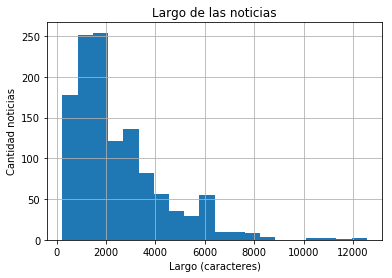

In [27]:
# Largo de noticias
df_cc_bodylen = df_cambioclim['body'].str.len().to_frame("bodylen").sort_values("bodylen", ascending=True)
bodylen_hist = df_cc_bodylen.hist(column='bodylen', bins=20)
plt.title('Largo de las noticias')
plt.xlabel('Largo (caracteres)')
plt.ylabel('Cantidad noticias')

In [32]:

df_cc_bodylen.describe()


,bodylen
count,1235.000000
mean,2473.384615
std,1827.724567
min,237.000000
25%,1066.000000
50%,1956.000000
75%,3209.500000
max,12555.000000


In [33]:
# Periodo de tiempo noticias por medio
df_cambioclim.groupby('media').agg({'datetime':['min', 'max', 'count']})


datetime                            
                                    min                   max count
media                                                              
 24HorasTVN        2017-02-09 22:46:07   2018-03-25 05:11:51     40
 AQUASocial        2017-02-06 11:54:07   2018-04-03 09:33:52     26
 AgriculturaFM     2017-04-21 15:43:15   2017-11-22 20:45:30      6
 AntofagastaTV     2017-08-09 18:31:52   2017-08-29 11:01:58      2
 AoLaonline        2018-02-06 09:24:26   2018-02-10 09:22:21      2
 AtacamaNoticias   2017-08-11 10:16:13   2017-08-30 10:18:18      2
 CHVNoticiascl     2017-04-06 16:40:07   2018-03-12 08:50:07     18
 CNNChile          2017-03-28 07:40:10   2018-03-19 20:37:42     20
 ChillanOnline     2017-06-02 16:00:26   2018-03-23 14:02:13      6
 Cooperativa       2017-03-25 22:34:02   2018-01-23 07:19:29     12
 CronicaChillan    2018-03-20 11:30:05   2018-03-20 11:30:05      1
 Cronica_Digital   2017-03-06 11:54:42   2018-02-24 12:16:52     31
 DFinanciero       2017-03-28 16:07:50   2018-03-16 16:50:00      6
 DMatamala         2017-09-11 12:11:29   2017-09-11 12:11:29      1
 DiarioConce       2017-06-29 18:00:58   2018-01-14 11:30:06      6
 DiarioLaHora      2017-05-04 09:30:26   2017-07-25 10:00:47      4
 DiarioOvalleHoy   2017-11-02 11:10:48   2017-11-02 11:10:48      1
 DiarioPaillaco    2017-05-15 17:38:44   2017-07-31 14:59:06      3
 DigitalFmChile    2017-03-24 23:48:02   2018-01-10 19:49:44      7
 ELCLARINDECHILE   2017-07-15 11:37:17   2018-02-24 22:57:43      3
 EYN_ELMERCURIO    2017-02-17 13:16:30   2017-08-11 14:13:47      5
 ElAriqueno        2017-06-01 21:11:05   2017-11-12 09:43:47      3
 ElBoyaldia        2017-02-23 18:43:36   2017-03-31 17:36:11      3
 ElDeportivoLT     2018-02-12 16:00:06   2018-04-16 08:46:35      5
 ElLongino         2017-05-31 11:34:17   2017-07-24 18:47:18      2
 ElPeriodista      2017-06-01 20:59:48   2017-11-29 20:57:41      4
 El_Ciudadano      2017-02-01 13:20:23   2018-04-18 09:01:32     37
 Elregionalcl      2017-03-21 03:36:25   2017-08-30 00:16:22     21
 Elvacanudo        2017-02-23 18:29:12   2018-03-14 20:03:09      4
 EnLineaMaule      2017-03-24 12:19:13   2017-07-25 07:15:05      4
...                                 ...                   ...   ...
 pinguinodiario    2017-03-28 20:20:07   2018-02-20 11:40:05     12
 pulso_tw          2017-02-17 16:25:15   2018-02-07 11:24:55     11
 radiomaray        2017-03-21 09:29:44   2018-01-11 09:08:29     12
 radiozero977      2017-02-15 18:20:01   2017-12-14 16:00:01      7
 redcomunales      2017-04-11 09:59:14   2017-11-02 11:27:17      4
 redpanguipulli    2017-07-31 16:50:51   2017-08-09 09:40:02      2
 revistaQP         2017-06-16 09:01:15   2017-06-25 18:00:01      3
 revistacapital    2017-02-01 13:00:44   2018-01-08 15:10:59     10
 rioenlinea        2017-02-28 08:00:28   2017-08-13 09:15:04      2
 rtierrabella      2017-03-11 21:00:02   2017-08-28 10:00:03      5
 sancarlosonline   2017-05-20 13:28:54   2018-03-22 10:49:00      4
 sexta_noticias    2017-07-12 08:32:06   2017-11-02 13:02:36      5
 soyantofagasta    2018-04-13 16:07:00   2018-04-13 16:07:00      1
 soychilecl        2017-03-24 23:48:02   2018-01-10 19:49:44      7
 soychillan        2018-03-20 14:12:31   2018-03-20 14:12:31      1
 soychiloe         2017-06-19 16:17:55   2017-06-19 16:17:55      1
 soycopiapo        2018-03-17 09:22:34   2018-03-17 09:22:34      1
 soyosorno         2017-03-21 11:45:57   2017-12-07 17:20:08      3
 soypuertomontt    2017-05-06 16:47:33   2018-02-05 14:00:42      4
 soyvalparaiso     2017-11-28 12:56:22   2017-11-28 12:56:22      1
 tentos            2017-03-24 23:01:22   2017-09-20 18:52:44      2
 thecliniccl       2017-03-09 18:40:56   2018-01-28 19:32:14     19
 tv_Amaro          2017-05-08 08:03:40   2017-09-25 23:00:28      2
 tvmaulinos        2017-07-09 11:25:56   2018-04-03 16:19:49      2
 tvosanvicente     2017-07-28 17:30:02   2017-08-24 18:30:12      2
 uchileradio       

In [64]:
tiempos = df_cambioclim['datetime'] = df_cambioclim['datetime'].astype('datetime64[ns]')
periodo_tiempo = tiempos.max() - df_cambioclim.datetime.min()
periodo_tiempo

Timedelta('460 days 03:15:46')

<h2> Primer análisis de tópicos </h2>

In [8]:
# Configurando diccionarios, tokenizer... con NLTK

import nltk
nltk.download('stopwords')
nltk.download('punkt')
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import adjusted_rand_score

stemmer = SnowballStemmer("spanish")

# load nltk's Spanish stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('spanish')
#stopwords.append('ejemplo')


# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import adjusted_rand_score

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Tópico #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


[nltk_data] Downloading package stopwords to /home/gauss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gauss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h3>Obteniendo número óptimo de tópicos para LDA (con diccionario y tokenizer NLTK)</h3>

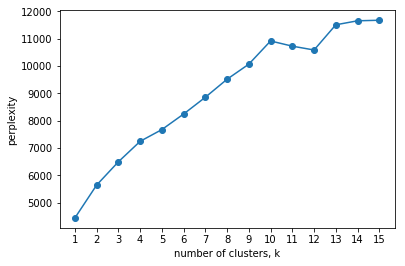

In [9]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import adjusted_rand_score

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Tópico #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

stopwords = nltk.corpus.stopwords.words('spanish')

tf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=7,
                                stop_words=stopwords,tokenizer=tokenize_only, ngram_range=(1,1))
# ej: "cambio climatico" esta en  todos los documentos (en  el 100% o 1.0) por eso no aparece en los topicos

tf = tf_vectorizer.fit_transform(docs)
diccionario= tf_vectorizer.get_feature_names()

num_k = range(1, 16)
perple = []

for k in num_k:
    lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=0)

    # Fit model to samples
    lda.fit(tf)

    # Append the perplexity to the list of perplexities
    perple.append(lda.perplexity(tf))


# Plot ks vs perplexity
plt.plot(num_k, perple, '-o')
plt.xlabel('number of topics')
plt.ylabel('perplexity')
plt.xticks(num_k)
plt.show()



<p>Se selecciona número de tópicos: <b>10</b>.</p>
<h3>Obtención de los tópicos con LDA</h3>

In [10]:
noftopics = 10

#Estimación de LDA con Bayes Variacional
lda = LatentDirichletAllocation(n_components=noftopics, max_iter=10,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=0)
# Fit model to samples
lda.fit(tf)
#Cálculo de índice de ajuste de los datos
#print(lda.perplexity(tf))
print("\nTópicos en el modelo LDA:\n")
print_top_words(lda, diccionario, 12)


Tópicos en el modelo LDA:

Topic #0: chile hace país medio acuerdo agua años región países global desarrollo mundo
Topic #1: servicio boscosos velar mantención deberá recuperación asumir urgencia prevenir marcados catástrofes cuidado
Topic #2: conduce duna.cl duna maria piso tras santa suministro providencia avenida acerca síguenos
Topic #3: hora wwf planeta chile luces edificios señal acción marzo sábado campaña adoptando
Topic #4: newsletter ciudad emol soychile.cl inmobiliaria guioteca farox contáctenos elige hoyxhoy.cl ¿cuándo entérate
Topic #5: minutos hace hawking stephen chile información acuerdo educación twitter cualquier planeta mar
Topic #6: diarios innovagro adecuadamente manejos comunales asimilar alero rumberg extranjera notablemente materializarse jurado
Topic #7: trump acuerdo unidos parís presidente decisión donald obama estadounidense eeuu blanca papa
Topic #8: loading working mayo mostrador sorprendió malas alarma podcast operativo cosechas avión subir
Topic #9: ene

<h2>Resultados del primer análisis de tópicos</h2>

<h3>Distribución de tópicos en los documentos (noticias)</h3>

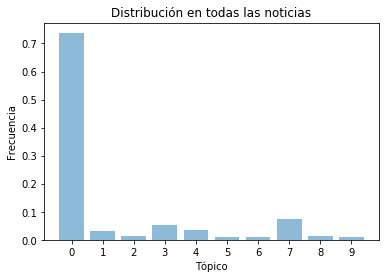

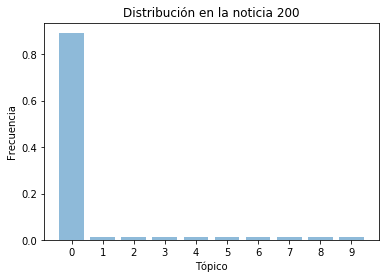

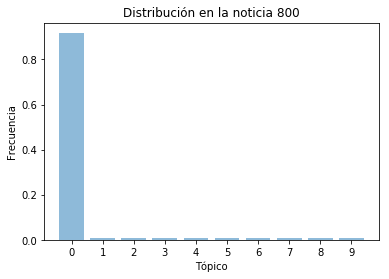

In [42]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

y=lda.fit_transform(tf)

#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,noftopics)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
plt.title('Distribución en todas las noticias')
plt.xlabel('Tópico')
plt.ylabel('Frecuencia')
show()

#distribución de tópicos en el documento 200
plt.bar(w,height=y[200],alpha=0.5,tick_label=w)
plt.title('Distribución en la noticia 200')
plt.xlabel('Tópico')
plt.ylabel('Frecuencia')
show()

#distribución de tópicos en el documento 800
plt.bar(w,height=y[800],alpha=0.5,tick_label=w)
plt.title('Distribución en la noticia 800')
plt.xlabel('Tópico')
plt.ylabel('Frecuencia')
show()

<h3>Distribución de palabras por tópico (valores no normalizados)</h3>

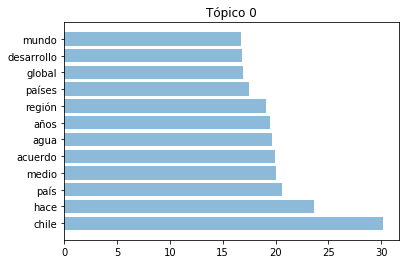

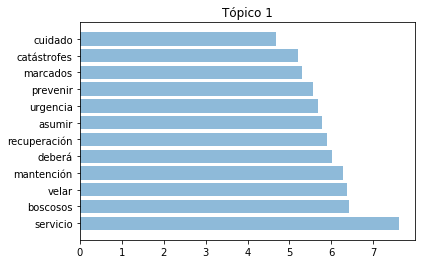

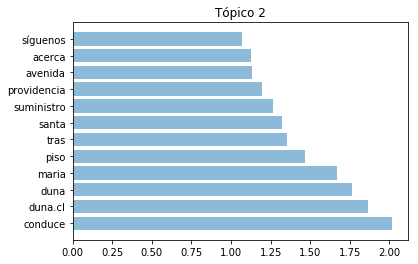

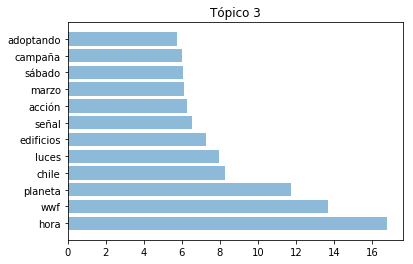

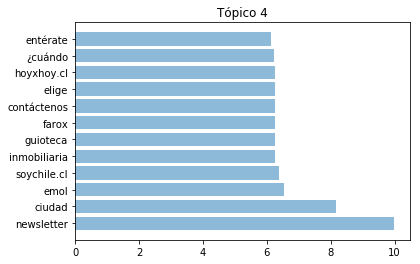

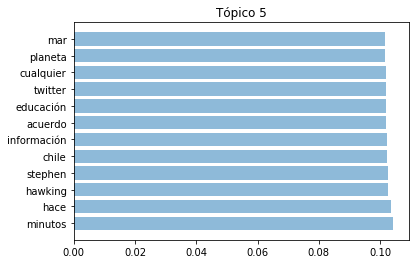

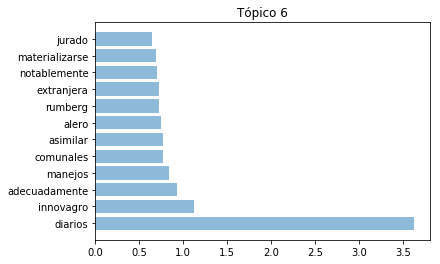

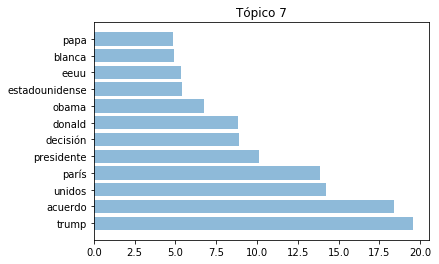

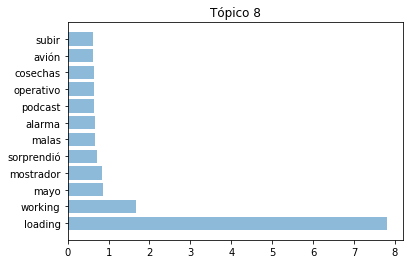

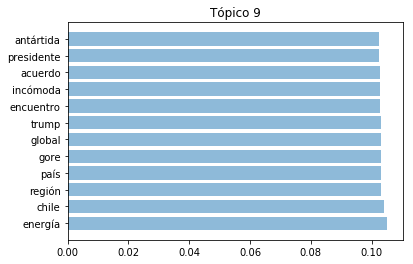

In [62]:
#Distribución de palabras por tópico
n_top_words=12
numo =np.arange(0,n_top_words)

# components_: Variational parameters for topic word distribution. 
# Since the complete conditional for topic word distribution is 
# a Dirichlet, components_[i, j] can be viewed as pseudocount 
# that represents the number of times word j was assigned to topic i. 

#for idx,topic in enumerate(lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]):
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
          #print(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    #plt.xticks(range(int(min(d)), int(max(d))+1 ))
    plt.title("Tópico " + str(idx))
    show()

<h2> Preprocesamiento (filtrado) de datos </h2>
<p> Se hará una depuración de los datos, principalmente eliminando repeticiones (noticias repetidas) y noticias que podrían no tener relación con el tema (aquellas en que la frase "cambio climático" aparece como título de otra noticia).</p>
- Eliminar aquellas noticias repetidas.
- Eliminar noticias republicadas (comparar los primeros 200 caracteres).
- Eliminar los registros en que la frecuencia de las palabras "climático" es menor a 2.

In [18]:
# Eliminar noticias repetidas (misma noticias de medios relacionados entre si)
df_cambioclim2 = df_cambioclim.copy()
df_cambioclim2.sort_values('media', inplace=True) # ordenamos los valores
df_cambioclim2.drop_duplicates('body', keep="last", inplace=True) # Eliminamos los duplicados
df_cambioclim2.sort_index(inplace=True) 
len(df_cambioclim2) # Verificamos el largo del nuevo dataframe

1108

In [19]:
# Eliminar noticias repetidas comparando los primeros 200 caracteres 
# Eliminar noticias con frecuencia de la palabra climático menor a 2
#df_cctemp = pd.DataFrame(columns=(df_cambioclim2.columns.values.tolist()))
anterior = "temporal"
frames = []
for row, values in df_cambioclim2.iterrows():
    cuenta = values.body.count("climático") + values.body.count("climatico")
    if values.body[0:200]!=anterior and cuenta > 1:
        frames.append(values)
    anterior = values.body[0:200]
#print(len(frames))
df_cambioclim2 = pd.DataFrame.from_records(frames)


<h2>  Caracterización del conjunto de datos filtrados </h2>

- Los datos se componen de 781 observaciones tomadas durante un periodo de tiempo de 460 días 3 horas y 15 minutos, en un universo de 127 distintos medios de comunicación. 
- Respecto a las publicaciones por cada medio tienen frecuencias que van desde 1 a 74 y una media de publicaciones de 6,15.
- El largo promedio de cada artículo es de 2.967 caracteres, con largos entre 255 y  12.555 caracteres.

In [20]:
print(len(df_cambioclim2)) # Verificamos el largo del nuevo dataframe

publicacionesxmedio = df_cambioclim2.groupby("media").size().to_frame("nofnews").reset_index().sort_values("nofnews", ascending=False)
publicacionesxmedio

781


,media,nofnews
97,latercera,74
0,24HorasTVN,34
20,El_Ciudadano,34
80,elmostrador,32
57,biobio,31
10,Cronica_Digital,26
68,el_dinamo,22
1,AQUASocial,21
101,msncl,20
119,thecliniccl,17


In [71]:
publicacionesxmedio.describe()

,nofnews
count,127.000000
mean,6.149606
std,9.144413
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,74.000000


In [66]:
df_cc_bodylen.describe()

,bodylen
count,1235.000000
mean,2473.384615
std,1827.724567
min,237.000000
25%,1066.000000
50%,1956.000000
75%,3209.500000
max,12555.000000


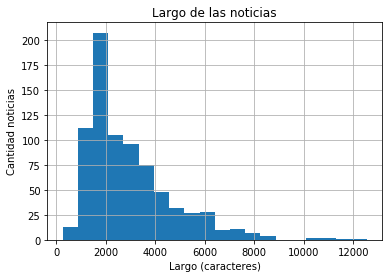

In [67]:
# Largo de noticias
df_cc_bodylen = df_cambioclim2['body'].str.len().to_frame("bodylen").sort_values("bodylen", ascending=False)
df_cc_bodylen.hist(column='bodylen', bins=20)
plt.title('Largo de las noticias')
plt.xlabel('Largo (caracteres)')
plt.ylabel('Cantidad noticias')

In [86]:
tiempos = df_cambioclim2['datetime'] = df_cambioclim2['datetime'].astype('datetime64[ns]')
periodo_tiempo = tiempos.max() - df_cambioclim2.datetime.min()
periodo_tiempo

Timedelta('460 days 03:15:46')

In [56]:
# Guardamos el nuevo conjunto de datos
df_cambioclim2.to_csv('./data/cambio_climatico_filtrado.csv', sep ='|') #guarda como csv

docs2 = df_cambioclim2["body"].as_matrix()

<h2> Análisis de tópicos con datos filtrados (con diccionario y tokenizer spaCy)</h2>

In [57]:
# Configurando diccionarios, tokenizer... con spaCy

import spacy
nlp = spacy.load('es')

def tokenize_lemmatize_filtering(text):
    filtered_lemmas = []
    doc = nlp(text)
    for token in doc:
        # Limpiamos los datos
        if(token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'VERB'):
            #filtered_lemmas.append(token.lemma_.lower())
            filtered_lemmas.append(token.text.lower())
    return filtered_lemmas
        


<h3>Obteniendo número óptimo de tópicos para LDA (para datos filtrados, con diccionario y tokenizer spaCy)</h3>

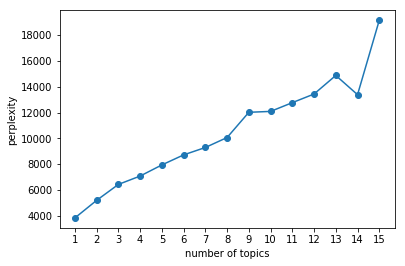

In [60]:
from spacy.lang.en.stop_words import STOP_WORDS
en_es_stop_words = STOP_WORDS.copy()

from spacy.lang.es.stop_words import STOP_WORDS
en_es_stop_words.update(STOP_WORDS)

en_es_stop_words.add("url")
en_es_stop_words.add("href")
en_es_stop_words.add("<")
en_es_stop_words.add(">")
en_es_stop_words.add("=")
en_es_stop_words.add("[")
en_es_stop_words.add("]")
en_es_stop_words.add(".com")

tf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=7,
                                stop_words=en_es_stop_words, tokenizer=tokenize_lemmatize_filtering, ngram_range=(1,1))

tf = tf_vectorizer.fit_transform(docs2)
diccionario= tf_vectorizer.get_feature_names()

num_k = range(1, 16)
perple = []

for k in num_k:
    lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=0)

    # Fit model to samples
    lda.fit(tf)

    # Append the perplexity to the list of perplexities
    perple.append(lda.perplexity(tf))


# Plot ks vs perplexity
plt.plot(num_k, perple, '-o')
plt.xlabel('number of topics')
plt.ylabel('perplexity')
plt.xticks(num_k)
plt.show()


<p>Se selecciona número de tópicos: <b>13</b>.</p>
<h3>Obtención de los tópicos con LDA</h3>

In [61]:
noftopics = 13

lda = LatentDirichletAllocation(n_components=noftopics, max_iter=10,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=0)
# Fit model to samples
lda.fit(tf)

print("\nTópicos en el modelo LDA:\n")
print_top_words(lda, diccionario, 12)


Tópicos en el modelo LDA:

Topic #0: servicio mantención velar recuperación asumir urgencia catástrofes prevenir marcados cuidado contexto incendios
Topic #1: minutos limpia empresa agua trudeau energía bachelet tasa agencia población intendente chile
Topic #2: trump unidos parís presidente donald decisión obama ee.uu blanca eeuu estadounidense casa
Topic #3: bosques wwf hora edificios deforestación chile destacará emblemáticos aludiendo planeta juegan logró
Topic #4: wwf hora planeta conéctate adoptando voluntaria chile marzo sábado ambiental llamado edificios
Topic #5: diarios océano país hielo universidad agricultura reuters principal ártico chillán estudio seminario
Topic #6: chile país años desarrollo efectos universidad agua planeta nivel países global nacional
Topic #7: municipios chile red trump gestión mar futuro agricultura cooperación adapt ríos región
Topic #8: plan energía trump medidas chile regional acción nacional ambiente comunal carbón energías
Topic #9: apagarán mon

<h2>Resultados del análisis de tópicos a partir de datos filtrados</h2>
<h3>Distribución de tópicos en los documentos (noticias) con datos filtrados</h3>

[ 0.01086409  0.00794979  0.12624025  0.00794979  0.03106111  0.00794979
  0.75611552  0.00794979  0.00794979  0.0121207   0.00794979  0.00794979
  0.00794979]


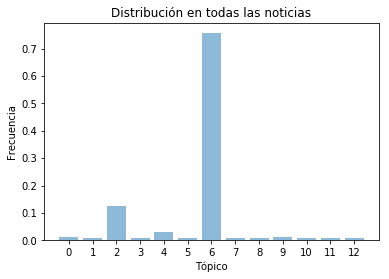

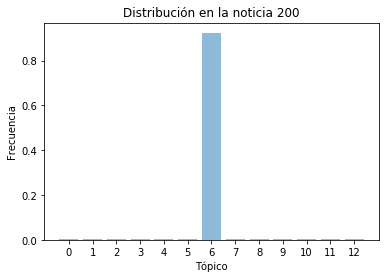

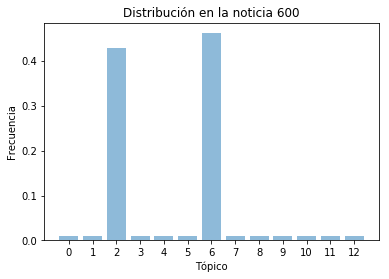

In [62]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

y=lda.fit_transform(tf)

#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs2)
w=np.arange(0,noftopics)
print(dist)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
plt.title('Distribución en todas las noticias')
plt.xlabel('Tópico')
plt.ylabel('Frecuencia')
show()

#distribución de tópicos en el documento 200
plt.bar(w,height=y[200],alpha=0.5,tick_label=w)
plt.title('Distribución en la noticia 200')
plt.xlabel('Tópico')
plt.ylabel('Frecuencia')
show()

#distribución de tópicos en el documento 600
plt.bar(w,height=y[600],alpha=0.5,tick_label=w)
plt.title('Distribución en la noticia 600')
plt.xlabel('Tópico')
plt.ylabel('Frecuencia')
show()

<h3>Distribución de palabras por tópico (valores no normalizados)</h3>

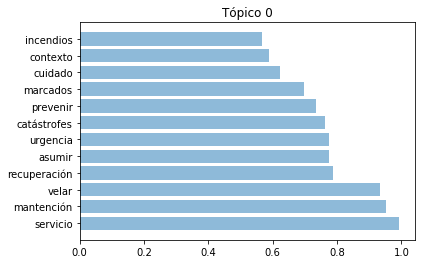

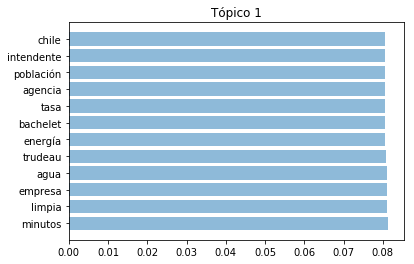

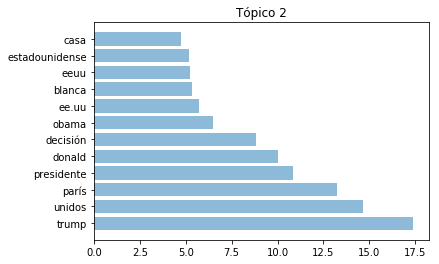

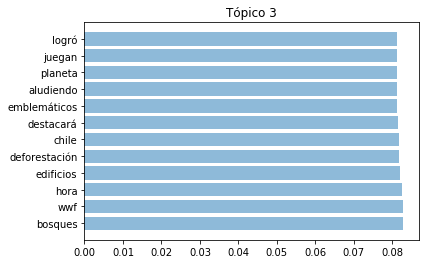

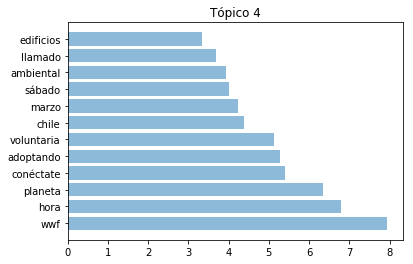

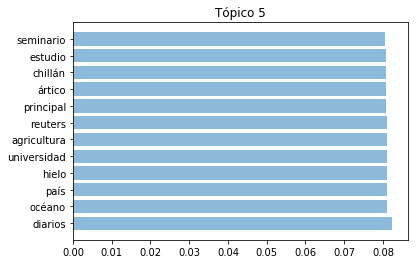

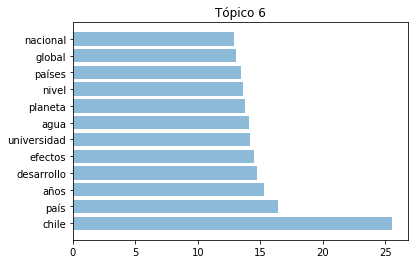

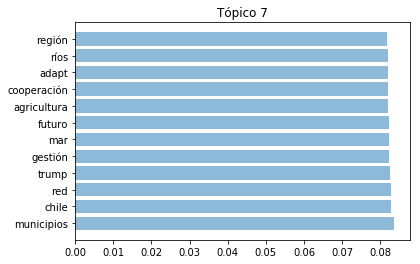

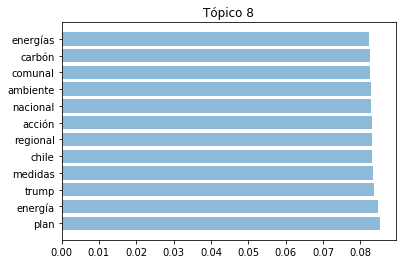

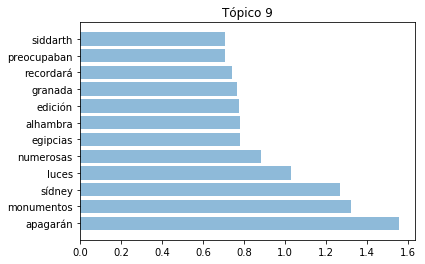

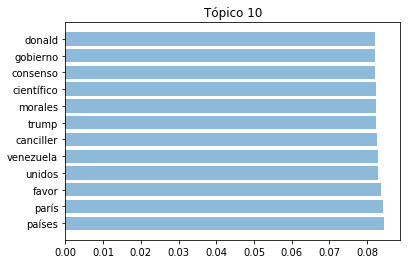

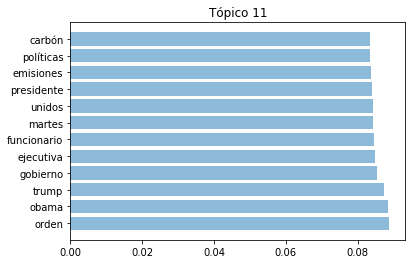

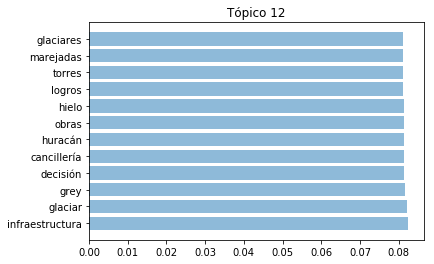

In [65]:
#Distribución de palabras por tópico
n_top_words=12
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
          #print(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    #plt.xticks(range(int(min(d)), int(max(d))+1 ))
    plt.title("Tópico " + str(idx))
    show()

<h2>Resultados</h2>
<p>A partir de los datos filtrados, se obtuvieron 13 tópicos:</p>
<p><b>Tópico #0</b>: servicio mantención velar recuperación asumir urgencia catástrofes prevenir marcados cuidado contexto incendios<br>
<b>Tópico #1</b>: minutos limpia empresa agua trudeau energía bachelet tasa agencia población intendente chile<br>
<b>Tópico #2: trump unidos parís presidente donald decisión obama ee.uu blanca eeuu estadounidense casa</b><br>
<b>Tópico #3</b>: bosques wwf hora edificios deforestación chile destacará emblemáticos aludiendo planeta juegan logró<br>
<b>Tópico #4: wwf hora planeta conéctate adoptando voluntaria chile marzo sábado ambiental llamado edificios</b><br>
<b>Tópico #5</b>: diarios océano país hielo universidad agricultura reuters principal ártico chillán estudio seminario<br>
<b>Tópico #6: chile país años desarrollo efectos universidad agua planeta nivel países global nacional</b><br>
<b>Tópico #7</b>: municipios chile red trump gestión mar futuro agricultura cooperación adapt ríos región<br>
<b>Tópico #8</b>: plan energía trump medidas chile regional acción nacional ambiente comunal carbón energías<br>
<b>Tópico #9</b>: apagarán monumentos sídney luces numerosas egipcias alhambra edición granada recordará preocupaban siddarth<br>
<b>Tópico #10</b>: países parís favor unidos venezuela canciller trump morales científico consenso gobierno donald<br>
<b>Tópico #11</b>: orden obama trump gobierno ejecutiva funcionario martes unidos presidente emisiones políticas carbón<br>
<b>Tópico #12</b>: infraestructura glaciar grey decisión cancillería huracán obras hielo logros torres marejadas glaciares</p>
<p>El tópico de mayor frecuencia de aparición en todos los documentos (cuerpo de las noticias) corresponde al <b>Tópico #6</b>, (75,61%) seguido del <b>Tópico #2</b> (12,62%). Los restantes tópicos tienen, mayormente, una presencia menor al 1%, salvo el <b>Tópico #4</b> que llega al 3,1%.</p>

<h2>Conclusiones</h2>  
<p>A la pregunta de investigación "¿Pueden identificarse mediante un análisis de tópicos, posturas respecto del tema cambio climático en noticias de medios de prensa escritos chilenos?" corresponde entregar como respuesta un no. <b>No es posible hacerlo</b> (al menos con los tópicos obtenidos).</p>
<p>Al revisar los tópicos, más aún en el dominante, cuesta encontrar verbos "de opinión" y términos utilizados para mostrar acuerdo o desacuerdo.</p>
<p>Entre los factores que influyeron a este resultado pueden incluirse:<br>
· Ruido en los datos.<br>
· Contenido carente de opinión, en los medios de prensa revisados.<br>
· Inadecuado proceso de filtrado de los datos.<br>
</p>
<p>Como limitaciones del trabajo realizado, podemos encontrar:<br>
· Volumen del conjunto de datos; tal vez con un mayor volumen de datos pudieron obtenerse tópicos más cercanos a lo deseado.<br>
· Mejor selección de las "stopwords".<br>
· Habría sido útil hacer el mismo análisis con otros conjuntos de datos que incluyeran otro concepto de uso común relacionado con el tema: ("calentamiento global"), ("cambio climático" OR "calentamiento global").</p>
<p>Finalmente, surgen necesidades futuras de investigación acerca de cómo obtener las posturas de los medios de prensa, cuando estas estén latentes. Tal vez no basta con analizar los contenidos en  forma independiente, si no que hay que ver el tratamiento que da el medio a lo largo del tiempo.
</p>

<h2>Referencias</h2>
<p>[1] Colaboradores de Wikipedia. Cambio climático [en línea]. Wikipedia, La enciclopedia libre, 2018 [fecha de consulta: 11 de junio de 2018]. Disponible en <https://es.wikipedia.org/w/index.php?title=Cambio_clim%C3%A1tico></p>
<p>[2] Cochrane, Michael. Modeling Climate Change Policy Decisions Using a Probability Tree. Watts Up With That?, 2016 [fecha de consulta: 10 de junio de 2018]. Disponible en <https://wattsupwiththat.com/2016/09/21/modeling-climate-change-policy-decisions-using-a-probability-tree/></p>
<p>[3] U.S. Environmental Protection Agency. Glossary of Climate Change Terms. EPA, 2018 [fecha de consulta: 11 de junio de 2018]. Disponible en <https://www3.epa.gov/climatechange/glossary.html></p>
<p>[4] Colaboradores de Wikipedia. Anexo:Glosario de cambio climático [en línea]. Wikipedia, La enciclopedia libre, 2017 [fecha de consulta: 11 de junio de 2018]. Disponible en <https://es.wikipedia.org/w/index.php?title=Anexo:Glosario_de_cambio_clim%C3%A1tico></p>